In [2]:
import pandas as pd

In [3]:
## get the headers from the headers csv file for FEC data
import csv
headers = None
with open("indiv_header_file.csv") as csvf:
    header = csv.reader(csvf, delimiter= ",")
    for row in header:
        headers = row

https://www.fec.gov/campaign-finance-data/contributions-individuals-file-description/

Link to the description of the data from the FEC

## First will be 2015-2016

In [4]:
headers

['CMTE_ID',
 'AMNDT_IND',
 'RPT_TP',
 'TRANSACTION_PGI',
 'IMAGE_NUM',
 'TRANSACTION_TP',
 'ENTITY_TP',
 'NAME',
 'CITY',
 'STATE',
 'ZIP_CODE',
 'EMPLOYER',
 'OCCUPATION',
 'TRANSACTION_DT',
 'TRANSACTION_AMT',
 'OTHER_ID',
 'TRAN_ID',
 'FILE_NUM',
 'MEMO_CD',
 'MEMO_TEXT',
 'SUB_ID']

In [4]:
df = pd.read_csv("itcont.txt", sep="|",names=headers)

/var/folders/2y/hdx3x2z50hq28dwpln9gpnqw0000gn/T/ipykernel_51124/2900929801.py:1: DtypeWarning: Columns (5,10,15,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("itcont.txt", sep="|",names=headers)


In [5]:
df = df[df['CMTE_ID']=="C00577130"] # committee id for sanders
df = df[df['TRANSACTION_AMT'] <= 2900] # max individual donation
df = df[df['TRANSACTION_AMT']> 0] # min donation

In [6]:
import matplotlib.pyplot as plt

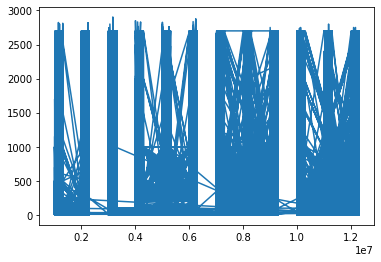

In [7]:
plt.plot(df['TRANSACTION_DT'], df['TRANSACTION_AMT'])
plt.show()

In [ ]:
import datetime
def parseDate(date: float):
    """parse date from the float number in original dataset"""
    date_num_str = str(int(date))
    year = int(date_num_str[-4:])
    day = int(date_num_str[-6:-4])
    month = int(date_num_str[-8:-6])
    
    return datetime.datetime(year, month, day)

In [9]:
df['TRANSACTION_DT']=df['TRANSACTION_DT'].apply(parseDate)

In [10]:
df.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
1452635,C00577130,A,Q2,P2016,201605039015379599,15E,IND,"BENNETT, WILLIAM",RINGWOOD,NJ,...,BANK OF AMERICA,LEADERSHIP DEVELOPMENT,2015-06-26,500,C00401224,VPF7BE2XMT0,1070785.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4050320161291351362
1452636,C00577130,A,Q2,P2016,201605039015379600,15E,IND,"BENSMAN, MIRIAM",RICHMOND HILL,NY,...,AB,EDITOR,2015-06-26,250,C00401224,VPF7BE2XH99,1070785.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4050320161291351364
1452637,C00577130,A,Q2,P2016,201605039015380080,15E,IND,"ROGERS-RAMACHANDRAN, DIANE",DEL MAR,CA,...,UCSD,RESEARCH FACULTY,2015-06-28,300,C00401224,VPF7BE2XM38,1070785.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4050320161291352803
1452638,C00577130,A,Q2,P2016,201605039015377864,15E,IND,"EMLEY, BOB",URBANDALE,IA,...,NOT EMPLOYED,NOT EMPLOYED,2015-06-13,500,C00401224,VPF7BE4CXV8,1070785.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4050320161291346155
1452639,C00577130,A,Q2,P2016,201605039015378346,15E,IND,"TENNENT, JEREMY",BLOOMINGTON,IN,...,NOT EMPLOYED,NOT EMPLOYED,2015-06-15,250,C00401224,VPF7BE2N090,1070785.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4050320161291347602


In [11]:
## Aggregate SUM on transaction_amnt grouped by the transaction data. Amount of donations each day
dg = df.groupby('TRANSACTION_DT').sum('TRANSACTION_AMT')
dg = dg.reset_index()

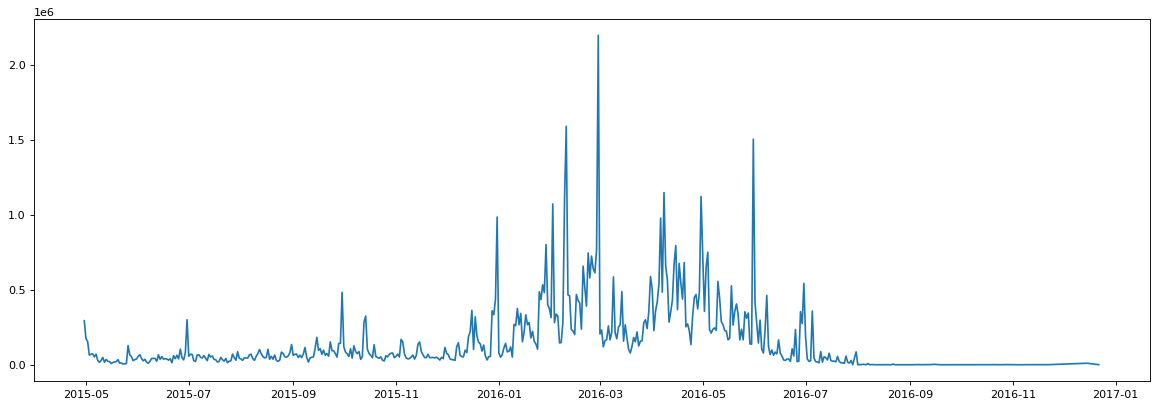

In [12]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(dg['TRANSACTION_DT'], dg['TRANSACTION_AMT'])
plt.show()

In [13]:
dg.head()

,TRANSACTION_DT,IMAGE_NUM,TRANSACTION_AMT,FILE_NUM,SUB_ID
0,2015-04-30,2.421277e+20,293586,1.286013e+09,4.864435e+21
1,2015-05-01,1.344706e+20,174595,7.142136e+08,2.701564e+21
2,2015-05-02,1.169309e+20,154581,6.210553e+08,2.349186e+21
3,2015-05-03,5.564299e+19,64761,2.955367e+08,1.117888e+21
4,2015-05-04,4.737718e+19,70075,2.516345e+08,9.518252e+20


In [14]:
bird_start = datetime.datetime(2016, 3, 1) 
bird_peak = datetime.datetime(2016, 4, 2)
bird_end = datetime.datetime(2016, 8, 30) 

In [15]:
bird_meme = dg[(dg["TRANSACTION_DT"]<= bird_end) & (dg["TRANSACTION_DT"] >= bird_start)]

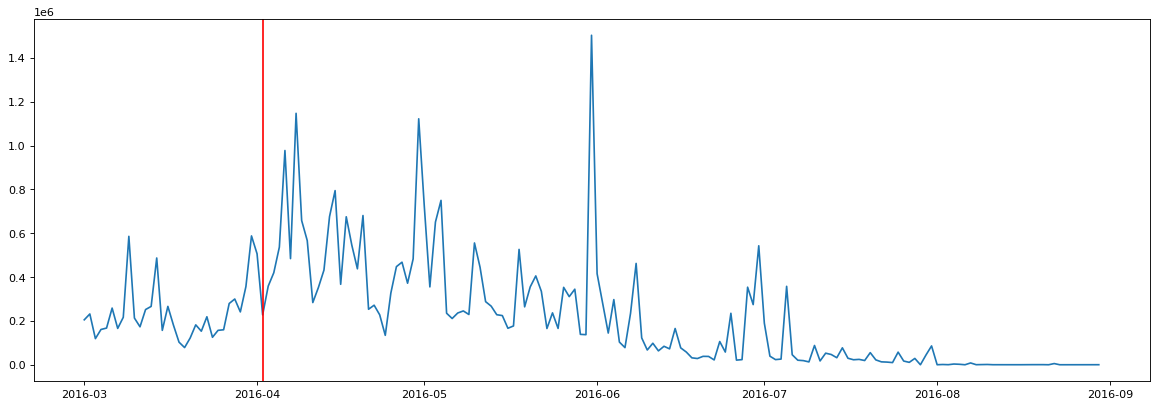

In [16]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(bird_meme['TRANSACTION_DT'], bird_meme['TRANSACTION_AMT'])
plt.axvline(x=bird_peak, color = 'r')
plt.show()

In [17]:
bern_start = datetime.datetime(2015, 6, 1) 
bern_peak = datetime.datetime(2016, 2, 9)
bern_end = datetime.datetime(2016, 8, 21)

In [18]:
bern_meme = dg[(dg["TRANSACTION_DT"] <= bern_end) & (dg["TRANSACTION_DT"] >= bern_start)]

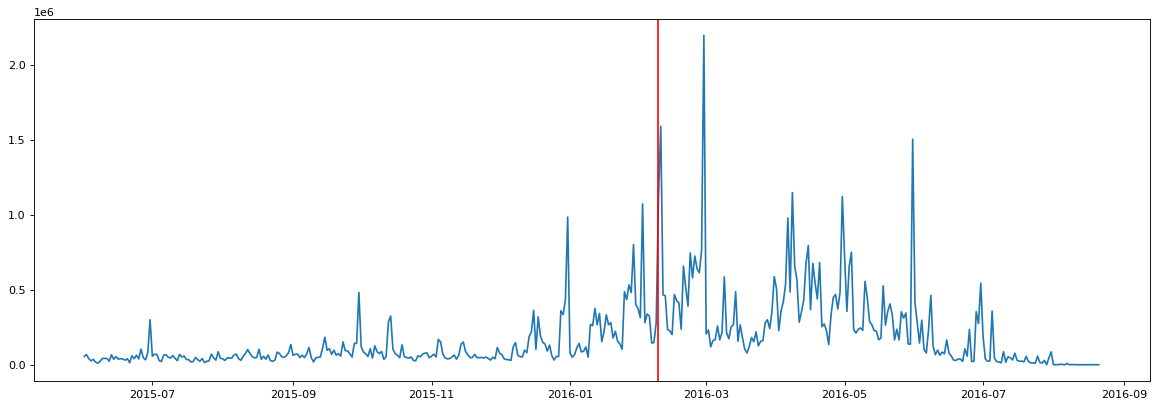

In [19]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(bern_meme['TRANSACTION_DT'], bern_meme['TRANSACTION_AMT'])
plt.axvline(x=bern_peak, color = 'r')
plt.show()

In [20]:
barnie_start = datetime.datetime(2016, 1, 1)
barnie_peak = datetime.datetime(2016, 1, 17)
barnie_end = datetime.datetime(2016, 3, 31)

In [21]:
barnie_meme = dg[(dg["TRANSACTION_DT"] <= bern_end) & (dg["TRANSACTION_DT"] >= bern_start)]

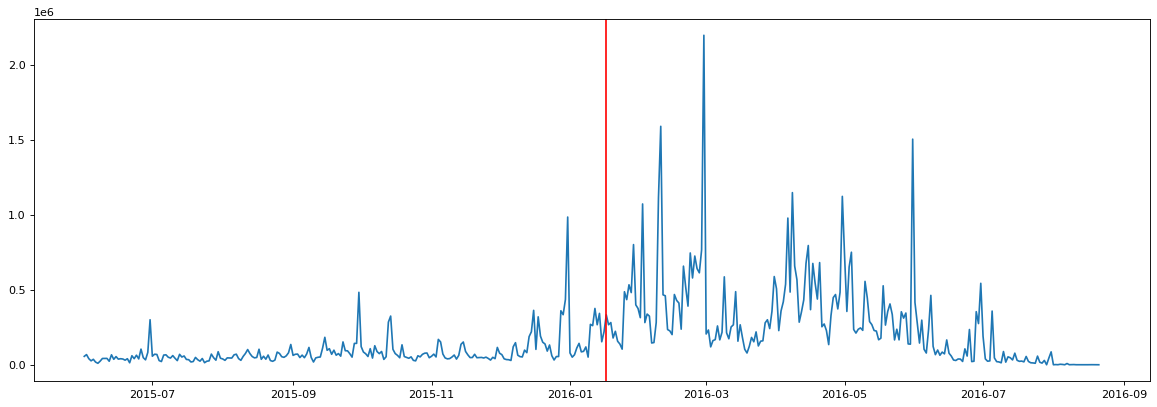

In [22]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(barnie_meme['TRANSACTION_DT'], barnie_meme['TRANSACTION_AMT'])
plt.axvline(x=barnie_peak, color = 'r')
plt.show()

## Now we explore data in the 2019-2020 range

C00696948 -- Bernie 2020 committee number



In [ ]:
df20 = pd.read_csv("itcont20.txt", sep="|",names=headers, error_bad_lines=False)

/var/folders/2y/hdx3x2z50hq28dwpln9gpnqw0000gn/T/ipykernel_51694/414312732.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df20 = pd.read_csv("itcont20.txt", sep="|",names=headers, error_bad_lines=False)
b'Skipping line 20469272: expected 21 fields, saw 25\n'
b'Skipping line 20601654: expected 21 fields, saw 22\n'
b'Skipping line 25510667: expected 21 fields, saw 26\n'
b'Skipping line 26275472: expected 21 fields, saw 26\n'
b'Skipping line 45261361: expected 21 fields, saw 26\n'


In [24]:
len(headers)

21

In [ ]:
df20 = df20[df20['CMTE_ID']=="C00696948"] # committee id for sanders
df20 = df20[df20['TRANSACTION_AMT'] <= 2900] # max individual donation
df20 = df20[df20['TRANSACTION_AMT']> 0] # min donation

In [ ]:
df20['TRANSACTION_DT']=df20['TRANSACTION_DT'].apply(parseDate)

In [ ]:
## Aggregate SUM on transaction_amnt grouped by the transaction data. Amount of donations each day
dg20 = df20.groupby('TRANSACTION_DT').sum('TRANSACTION_AMT')
dg20 = dg20.reset_index()